# Modelagem de tópicos
### corpus: artigos e resumos do ENANCIB 2016

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub(" citações "," citação ",texto.lower())
    texto = re.sub(" links "," link ",texto.lower())
   #texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub("museus","museu",texto.lower())
    texto = re.sub(" literacy "," alfabetização ",texto.lower())  
    texto = re.sub(" bibliotecas "," biblioteca ",texto.lower())
    texto = re.sub(" informações "," informação ",texto.lower())
    texto = re.sub(" information "," informação ",texto.lower())
    texto = re.sub(" bibliographia "," bibliografia ",texto.lower())
    texto = re.sub(" termos "," termo ",texto.lower())
    texto = re.sub(" knowledge "," conhecimento ",texto.lower())  
    texto = re.sub(" accessibility "," acessibilidade ",texto.lower())  
    texto = re.sub(" research "," pesquisa ",texto.lower()) 
    texto = re.sub(" image "," imagem ",texto.lower()) 
    texto = re.sub(" archivists "," arquivistas ",texto.lower()) 
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())
    texto = re.sub(" los ", "", texto.lower())
    texto = re.sub(" las ", "", texto.lower())
    return texto

In [3]:
#CONFIGURANDO STOP_WORDS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))
stop_words_us =  set(stopwords.words('spanish'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['tais','xviii','jan.',' jul.',' jan ','and','the','acho','lo','pra','é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','https','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez','então','aqui','enancib']


stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "enancib_2016_gts"
caminho="" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

389


In [6]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

['xvii enancib (xvii enancib)gt 1 – estudos históricos e epistemológicos da ciência da informaçãoo bibliotecário universitário como agente mediador: ascontribuições do mapa do conhecimento da ciência dainformação de zins para a competência em informação (coinfo)the university librarian as agent mediator: the contributions ofknowledge map of  informação science by zins for informationliteracy (coinfo)rafael barcelos santos1 e elmira luzia melo soares simeão2modalidade da apresentação: comunicação oralresumo: aborda as relações existentes entre o mapa do conhecimento da ciência da informação dezins (2007) e a ação mediadora do bibliotecário universitário nas iniciativas formadoras decompetência em informação. esta pesquisa busca responder a seguinte questão: de que forma afunção mediadora do bibliotecário universitário está integrada ao mapa do conhecimento da ciênciada informação de zins?. para tanto, a investigação inicialmente concentrou em analisar as estruturasdo mapa do conheciment

In [7]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [8]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [9]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 1072464
Total de Bigramas: 1072075
Total de Trigramas: 1071686


In [10]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO com n-gramas
print(tokenized_data[1])

['estudos', 'históricos', 'epistemológicos', 'informaçãoo', 'bibliotecário', 'universitário', 'agente', 'mediador', 'ascontribuições', 'mapa', 'conhecimento', 'dainformação', 'zins', 'competência', 'informação', 'coinfo', 'university', 'librarian', 'agent', 'mediator', 'contributions', 'ofknowledge', 'map', 'informação', 'science', 'zins', 'informationliteracy', 'coinfo', 'rafael', 'barcelos', 'santos1', 'elmira', 'luzia', 'melo', 'soares', 'simeão2modalidade', 'apresentação', 'comunicação', 'oralresumo', 'aborda', 'relações', 'existentes', 'mapa', 'conhecimento', 'informação', 'dezins', 'mediadora', 'bibliotecário', 'universitário', 'iniciativas', 'formadoras', 'decompetência', 'informação', 'pesquisa', 'busca', 'responder', 'seguinte', 'questão', 'forma', 'afunção', 'mediadora', 'bibliotecário', 'universitário', 'integrada', 'mapa', 'conhecimento', 'informação', 'zins', 'investigação', 'inicialmente', 'concentrou', 'analisar', 'estruturasdo', 'mapa', 'conhecimento', 'informação', 'zi

# CRIANDO A FREQUÊNCIA

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 1000
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_geral_artigosresumos_enancib_2016_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 22559, 'pesquisa': 6547, 'conhecimento': 5893, 'dados': 4028, 'biblioteca': 3228, 'forma': 3081, 'comunicação': 3031, 'memória': 3003, 'social': 2996, 'processo': 2888, 'produção': 2718, 'uso': 2653, 'documentos': 2540, 'organização': 2504, 'gestão': 2421, 'brasil': 2272, 'meio': 2217, 'relação': 2170, 'estudo': 2133, 'científica': 2049, 'universidade': 2036, 'estudos': 2031, 'trabalho': 2012, 'paulo': 1921, 'contexto': 1896, 'desenvolvimento': 1880, 'sociais': 1870, 'tecnologia': 1840, 'usuários': 1812, 'termo': 1777, 'digital': 1689, 'sociedade': 1689, 'cultura': 1675, 'museu': 1634, 'busca': 1606, 'nacional': 1606, 'sistema': 1594, 'autores': 1576, 'representação': 1546, 'modelo': 1524, 'resultados': 1521, 'federal': 1511, 'campo': 1494, 'diferentes': 1480, 'web': 1478, 'relações': 1454, 'cultural': 1444, 'base': 1429, 'sistemas': 1429, 'processos': 1428, 'conceito': 1427, 'instituições': 1410, 'construção': 1403, 'documento': 1391, 'arquivos': 1366, 'históri

[('informação', 22559),
 ('pesquisa', 6547),
 ('conhecimento', 5893),
 ('dados', 4028),
 ('biblioteca', 3228),
 ('forma', 3081),
 ('comunicação', 3031),
 ('memória', 3003),
 ('social', 2996),
 ('processo', 2888),
 ('produção', 2718),
 ('uso', 2653),
 ('documentos', 2540),
 ('organização', 2504),
 ('gestão', 2421),
 ('brasil', 2272),
 ('meio', 2217),
 ('relação', 2170),
 ('estudo', 2133),
 ('científica', 2049),
 ('universidade', 2036),
 ('estudos', 2031),
 ('trabalho', 2012),
 ('paulo', 1921),
 ('contexto', 1896),
 ('desenvolvimento', 1880),
 ('sociais', 1870),
 ('tecnologia', 1840),
 ('usuários', 1812),
 ('termo', 1777),
 ('digital', 1689),
 ('sociedade', 1689),
 ('cultura', 1675),
 ('museu', 1634),
 ('busca', 1606),
 ('nacional', 1606),
 ('sistema', 1594),
 ('autores', 1576),
 ('representação', 1546),
 ('modelo', 1524),
 ('resultados', 1521),
 ('federal', 1511),
 ('campo', 1494),
 ('diferentes', 1480),
 ('web', 1478),
 ('relações', 1454),
 ('cultural', 1444),
 ('base', 1429),
 ('siste

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 1000
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_unigrama_artigosresumos_enancib_2016_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 22559, 'pesquisa': 6547, 'conhecimento': 5893, 'dados': 4028, 'biblioteca': 3228, 'forma': 3081, 'comunicação': 3031, 'memória': 3003, 'social': 2996, 'processo': 2888, 'produção': 2718, 'uso': 2653, 'documentos': 2540, 'organização': 2504, 'gestão': 2421, 'brasil': 2272, 'meio': 2217, 'relação': 2170, 'estudo': 2133, 'científica': 2049, 'universidade': 2036, 'estudos': 2031, 'trabalho': 2012, 'paulo': 1921, 'contexto': 1896, 'desenvolvimento': 1880, 'sociais': 1870, 'tecnologia': 1840, 'usuários': 1812, 'termo': 1777, 'digital': 1689, 'sociedade': 1689, 'cultura': 1675, 'museu': 1634, 'busca': 1606, 'nacional': 1606, 'sistema': 1594, 'autores': 1576, 'representação': 1546, 'modelo': 1524, 'resultados': 1521, 'federal': 1511, 'campo': 1494, 'diferentes': 1480, 'web': 1478, 'relações': 1454, 'cultural': 1444, 'base': 1429, 'sistemas': 1429, 'processos': 1428, 'conceito': 1427, 'instituições': 1410, 'construção': 1403, 'documento': 1391, 'arquivos': 1366, 'históri

[('informação', 22559),
 ('pesquisa', 6547),
 ('conhecimento', 5893),
 ('dados', 4028),
 ('biblioteca', 3228),
 ('forma', 3081),
 ('comunicação', 3031),
 ('memória', 3003),
 ('social', 2996),
 ('processo', 2888),
 ('produção', 2718),
 ('uso', 2653),
 ('documentos', 2540),
 ('organização', 2504),
 ('gestão', 2421),
 ('brasil', 2272),
 ('meio', 2217),
 ('relação', 2170),
 ('estudo', 2133),
 ('científica', 2049),
 ('universidade', 2036),
 ('estudos', 2031),
 ('trabalho', 2012),
 ('paulo', 1921),
 ('contexto', 1896),
 ('desenvolvimento', 1880),
 ('sociais', 1870),
 ('tecnologia', 1840),
 ('usuários', 1812),
 ('termo', 1777),
 ('digital', 1689),
 ('sociedade', 1689),
 ('cultura', 1675),
 ('museu', 1634),
 ('busca', 1606),
 ('nacional', 1606),
 ('sistema', 1594),
 ('autores', 1576),
 ('representação', 1546),
 ('modelo', 1524),
 ('resultados', 1521),
 ('federal', 1511),
 ('campo', 1494),
 ('diferentes', 1480),
 ('web', 1478),
 ('relações', 1454),
 ('cultural', 1444),
 ('base', 1429),
 ('siste

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 1000
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_bigrama_artigosresumos_enancib_2016_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'universidade_federal': 884, 'informação_tecnologia': 756, 'informação_science': 627, 'produção_científica': 593, 'recuperação_informação': 564, 'informação_conhecimento': 502, 'organização_conhecimento': 495, 'belo_horizonte': 404, 'gestão_informação': 389, 'gestão_conhecimento': 350, 'informação_universidade': 334, 'competência_informação': 332, 'arquitetura_informação': 324, 'informação_comunicação': 315, 'organização_informação': 313, 'uso_informação': 312, 'dissertação_mestrado': 312, 'pesquisa_informação': 306, 'comunicação_científica': 302, 'bases_dados': 295, 'apresentação_comunicação': 286, 'redes_sociais': 283, 'sintagmas_nominais': 276, 'biblioteca_universitárias': 269, 'informação_informação': 266, 'patrimônio_cultural': 264, 'ponto_vista': 262, 'coleta_dados': 262, 'dados_pesquisa': 247, 'nacional_pesquisa': 243, 'fontes_informação': 242, 'tecnologias_informação': 239, 'conhecimento_organization': 239, 'encontro_nacional': 233, 'base_dados': 233, 'informação_bras

[('universidade_federal', 884),
 ('informação_tecnologia', 756),
 ('informação_science', 627),
 ('produção_científica', 593),
 ('recuperação_informação', 564),
 ('informação_conhecimento', 502),
 ('organização_conhecimento', 495),
 ('belo_horizonte', 404),
 ('gestão_informação', 389),
 ('gestão_conhecimento', 350),
 ('informação_universidade', 334),
 ('competência_informação', 332),
 ('arquitetura_informação', 324),
 ('informação_comunicação', 315),
 ('organização_informação', 313),
 ('uso_informação', 312),
 ('dissertação_mestrado', 312),
 ('pesquisa_informação', 306),
 ('comunicação_científica', 302),
 ('bases_dados', 295),
 ('apresentação_comunicação', 286),
 ('redes_sociais', 283),
 ('sintagmas_nominais', 276),
 ('biblioteca_universitárias', 269),
 ('informação_informação', 266),
 ('patrimônio_cultural', 264),
 ('ponto_vista', 262),
 ('coleta_dados', 262),
 ('dados_pesquisa', 247),
 ('nacional_pesquisa', 243),
 ('fontes_informação', 242),
 ('tecnologias_informação', 239),
 ('conhec

In [14]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 1000
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_trigrama_artigosresumos_enancib_2016_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'nacional_pesquisa_informação': 198, 'encontro_nacional_pesquisa': 197, 'informação_universidade_federal': 189, 'modalidade_apresentação_comunicação': 166, 'apresentação_comunicação_oralresumo': 163, 'universidade_federal_paraíba': 147, 'tecnologias_informação_comunicação': 133, 'dissertação_mestrado_informação': 132, 'international_organization_standardization': 122, 'comunicação_oral_resumo': 118, 'universidade_federal_santa': 117, 'sistemas_organização_conhecimento': 116, 'apresentação_comunicação_oral': 115, 'informação_belo_horizonte': 106, 'federal_santa_catarina': 105, 'gestão_informação_conhecimento': 104, 'fundação_oswaldo_cruz': 104, 'federal_minas_gerais': 102, 'sintagmas_nominais_descritores': 102, 'universidade_federal_minas': 101, 'society_informação_science': 99, 'american_society_informação': 97, 'informação_tecnologia_was': 94, 'resource_description_framework': 93, 'fonte_dados_pesquisa': 91, 'journal_american_society': 88, 'organização_representação_conhecim

[('nacional_pesquisa_informação', 198),
 ('encontro_nacional_pesquisa', 197),
 ('informação_universidade_federal', 189),
 ('modalidade_apresentação_comunicação', 166),
 ('apresentação_comunicação_oralresumo', 163),
 ('universidade_federal_paraíba', 147),
 ('tecnologias_informação_comunicação', 133),
 ('dissertação_mestrado_informação', 132),
 ('international_organization_standardization', 122),
 ('comunicação_oral_resumo', 118),
 ('universidade_federal_santa', 117),
 ('sistemas_organização_conhecimento', 116),
 ('apresentação_comunicação_oral', 115),
 ('informação_belo_horizonte', 106),
 ('federal_santa_catarina', 105),
 ('gestão_informação_conhecimento', 104),
 ('fundação_oswaldo_cruz', 104),
 ('federal_minas_gerais', 102),
 ('sintagmas_nominais_descritores', 102),
 ('universidade_federal_minas', 101),
 ('society_informação_science', 99),
 ('american_society_informação', 97),
 ('informação_tecnologia_was', 94),
 ('resource_description_framework', 93),
 ('fonte_dados_pesquisa', 91),
 (

## Gráfico

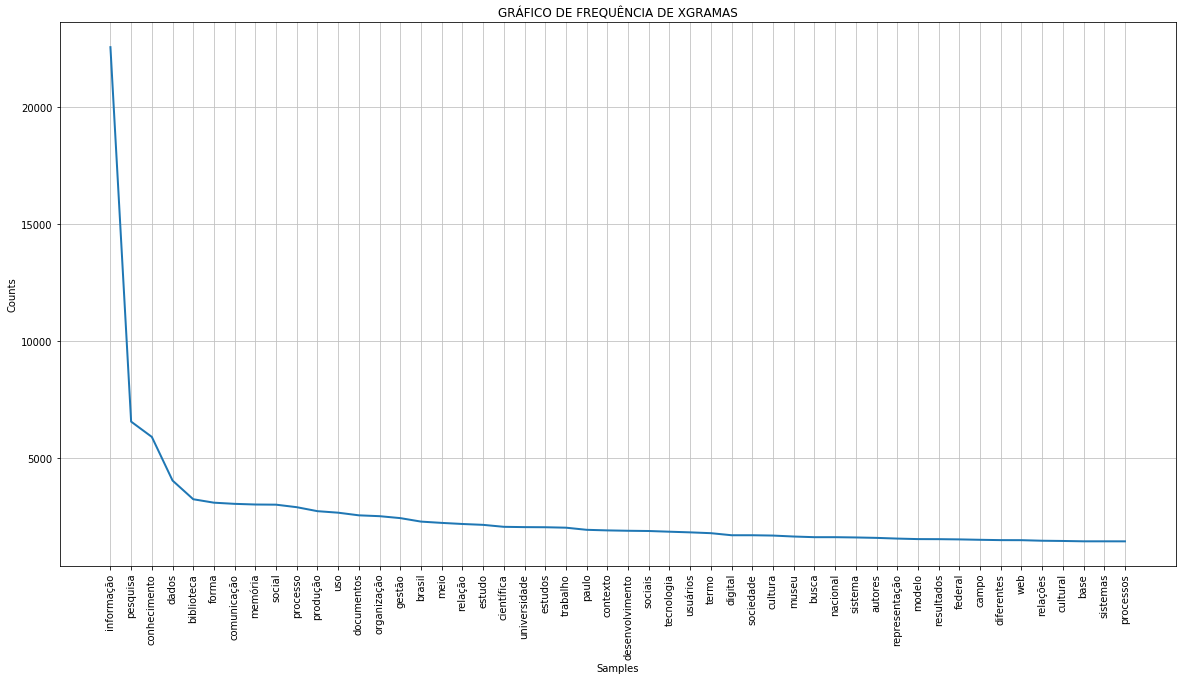

In [15]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

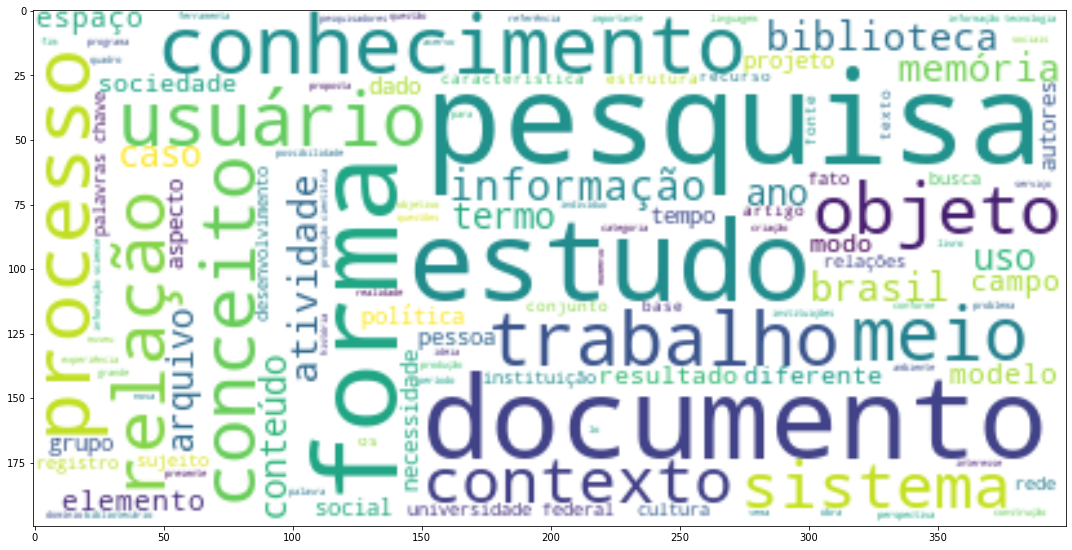

In [16]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 250
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("artigosresumos_nuv_enancib_2016_gts.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [17]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

## Latent Dirichlet Allocation (LDA)

### Modelo LDA - 10 tópicos

In [18]:
print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 10 TÓPICOS ==================================================

Wall time: 4min 2s
Tópico 0:  0.007*"informação" + 0.002*"conhecimento" + 0.001*"pesquisa" + 0.001*"organização" + 0.001*"forma" + 0.001*"representação" + 0.001*"dados" + 0.001*"comunicação" + 0.001*"recuperação" + 0.001*"modelo"
Tópico 1:  0.005*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"comunicação" + 0.001*"científica" + 0.001*"dados" + 0.001*"produção" + 0.001*"gestão" + 0.001*"periódicos" + 0.001*"processo"
Tópico 2:  0.001*"sintagmas" + 0.001*"nominais" + 0.001*"sintagmas_nominais" + 0.001*"dados" + 0.001*"descritores" + 0.001*"pesquisa" + 0.000*"artigos" + 0.000*"informação" + 0.000*"pesquisadores" + 0.000*"critério"
Tópico 3:  0.006*"informação" + 0.001*"pesquisa" + 0.001*"conhecimento" + 0.001*"biblioteca" + 0.001*"uso" + 0.001*"sociedade" + 0.001*"educação" + 0.001*"competência" + 0.001*"social" + 0.001*"dados"
Tópico 4:  0.002*"informaçã

### Modelo LDA - 14 tópicos

In [19]:
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 14 TÓPICOS ==================================================

Wall time: 5min 12s
Tópico 0:  0.001*"governança" + 0.001*"memória" + 0.000*"biblioteca" + 0.000*"transparência" + 0.000*"luiz" + 0.000*"discentes" + 0.000*"governance" + 0.000*"leitura" + 0.000*"disciplinas" + 0.000*"livro"
Tópico 1:  0.003*"informação" + 0.002*"dados" + 0.001*"sintagmas" + 0.001*"pesquisa" + 0.001*"nominais" + 0.001*"sintagmas_nominais" + 0.001*"indexação" + 0.001*"descritores" + 0.001*"usuários" + 0.001*"biblioteca"
Tópico 2:  0.001*"repositórios" + 0.001*"museologia" + 0.000*"digitais" + 0.000*"cursos" + 0.000*"repositórios_digitais" + 0.000*"digital" + 0.000*"usuário" + 0.000*"mestrado" + 0.000*"patrimônio" + 0.000*"metadados"
Tópico 3:  0.004*"informação" + 0.002*"museu" + 0.001*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"produção" + 0.001*"processo" + 0.001*"cultural" + 0.001*"relação" + 0.001*"estudos"
Tópico 4:  0.003*"informaçã

### Modelo LDA - 18 tópicos

In [20]:
print("=========================================== Modelo LDA: 18 TÓPICOS ==================================================\n")
num_topics = 18
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 18 TÓPICOS ==================================================

Wall time: 6min 32s
Tópico 0:  0.002*"dados" + 0.001*"reuso" + 0.001*"data" + 0.000*"reuso_dados" + 0.000*"pesquisa" + 0.000*"cientistas" + 0.000*"sociais" + 0.000*"social" + 0.000*"re-use" + 0.000*"dados_pesquisa"
Tópico 1:  0.001*"pesquisa" + 0.001*"produção" + 0.001*"científica" + 0.001*"brics" + 0.001*"empresas" + 0.001*"colaboração" + 0.001*"china" + 0.001*"redes" + 0.000*"arquivos" + 0.000*"rede"
Tópico 2:  0.007*"informação" + 0.003*"memória" + 0.002*"pesquisa" + 0.002*"social" + 0.001*"patrimônio" + 0.001*"conhecimento" + 0.001*"história" + 0.001*"cultural" + 0.001*"biblioteca" + 0.001*"forma"
Tópico 3:  0.012*"informação" + 0.002*"conhecimento" + 0.002*"pesquisa" + 0.002*"comunicação" + 0.001*"social" + 0.001*"produção" + 0.001*"mediação" + 0.001*"processo" + 0.001*"forma" + 0.001*"científica"
Tópico 4:  0.002*"conhecimento" + 0.002*"informação" + 0.001*"metad

### Modelo LDA - 22 tópicos

In [21]:
print("=========================================== Modelo LDA: 22 TÓPICOS ==================================================\n")
num_topics = 22
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 22 TÓPICOS ==================================================

Wall time: 7min 37s
Tópico 0:  0.001*"petróleo" + 0.001*"produção" + 0.001*"revistas" + 0.001*"museologia" + 0.001*"instituições" + 0.001*"direito" + 0.001*"artigos" + 0.000*"moderna" + 0.000*"brasil" + 0.000*"paulo"
Tópico 1:  0.000*"italiana" + 0.000*"literatura" + 0.000*"literatura_italiana" + 0.000*"traduzida" + 0.000*"patentes" + 0.000*"projeto" + 0.000*"italiana_traduzida" + 0.000*"descrição" + 0.000*"nome" + 0.000*"literatura_italiana_traduzida"
Tópico 2:  0.003*"informação" + 0.001*"objeto" + 0.001*"museu" + 0.001*"objetos" + 0.001*"pesquisa" + 0.001*"arte" + 0.001*"sistema" + 0.001*"representação" + 0.001*"patrimônio" + 0.001*"mediação"
Tópico 3:  0.000*"quinteto" + 0.000*"quinteto_paraíba" + 0.000*"paraíba" + 0.000*"armorial" + 0.000*"nordestina" + 0.000*"cordas" + 0.000*"musicais" + 0.000*"concertos" + 0.000*"erudita" + 0.000*"musical"
Tópico 4:  0.001*"cont

### Modelo LDA - 26 tópicos

In [22]:
print("=========================================== Modelo LDA: 26 TÓPICOS ==================================================\n")
num_topics = 26
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 26 TÓPICOS ==================================================

Wall time: 8min 37s
Tópico 0:  0.006*"informação" + 0.001*"conhecimento" + 0.001*"pesquisa" + 0.001*"gestão" + 0.001*"comunicação" + 0.001*"dados" + 0.001*"científica" + 0.001*"tecnologia" + 0.001*"documentos" + 0.001*"estudos"
Tópico 1:  0.010*"informação" + 0.002*"pesquisa" + 0.001*"dados" + 0.001*"organização" + 0.001*"conhecimento" + 0.001*"uso" + 0.001*"forma" + 0.001*"produção" + 0.001*"representação" + 0.001*"trabalho"
Tópico 2:  0.001*"informação" + 0.001*"coleção" + 0.001*"revistas" + 0.001*"informação_tecnológica" + 0.001*"avaliação" + 0.001*"produção" + 0.001*"artigos" + 0.001*"documentos" + 0.001*"cultura" + 0.001*"tecnológica"
Tópico 3:  0.001*"petróleo" + 0.001*"multimídia" + 0.001*"ontologias" + 0.000*"indústria" + 0.000*"petrobrás" + 0.000*"empresas" + 0.000*"recursos" + 0.000*"modelo" + 0.000*"petróleo_natural" + 0.000*"metadados"
Tópico 4:  0.004*"mus

### Modelo LDA - 30 tópicos

In [23]:
print("=========================================== Modelo LDA: 30 TÓPICOS ==================================================\n")
num_topics = 30

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 30 TÓPICOS ==================================================

Wall time: 10min 11s
Tópico 0:  0.003*"informação" + 0.002*"web" + 0.001*"conhecimento" + 0.001*"pesquisa" + 0.001*"histórias" + 0.001*"gestão" + 0.001*"modelo" + 0.001*"usuários" + 0.001*"busca" + 0.001*"projetos"
Tópico 1:  0.003*"comunicação" + 0.002*"informação" + 0.002*"conhecimento" + 0.001*"organizacional" + 0.001*"gestão" + 0.001*"organização" + 0.001*"processo" + 0.001*"estudo" + 0.001*"museu" + 0.001*"comunicação_organizacional"
Tópico 2:  0.001*"brics" + 0.000*"artigos" + 0.000*"lattes" + 0.000*"arqueologia" + 0.000*"temáticas" + 0.000*"crescimento" + 0.000*"mapeamento" + 0.000*"mpeg" + 0.000*"international_organization_standardization" + 0.000*"organization_standardization"
Tópico 3:  0.000*"dados" + 0.000*"informação" + 0.000*"pesquisa" + 0.000*"nominais" + 0.000*"conhecimento" + 0.000*"sintagmas_nominais" + 0.000*"sintagmas" + 0.000*"digital" + 0.000*"bib

### Modelo LDA - 34 tópicos

In [24]:
print("=========================================== Modelo LDA: 34 TÓPICOS ==================================================\n")
num_topics = 34

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 34 TÓPICOS ==================================================

Wall time: 11min 29s
Tópico 0:  0.013*"informação" + 0.003*"conhecimento" + 0.003*"pesquisa" + 0.003*"biblioteca" + 0.003*"gestão" + 0.003*"dados" + 0.002*"processo" + 0.001*"organização" + 0.001*"uso" + 0.001*"forma"
Tópico 1:  0.001*"repositórios" + 0.001*"digitais" + 0.001*"associação" + 0.001*"usuário" + 0.001*"repositórios_digitais" + 0.001*"cultura" + 0.001*"associações" + 0.001*"japonesa" + 0.000*"metadados" + 0.000*"busca"
Tópico 2:  0.001*"estágio" + 0.000*"curricular" + 0.000*"estágio_curricular" + 0.000*"online" + 0.000*"acadêmicas" + 0.000*"estágios" + 0.000*"pesquisadores" + 0.000*"presença" + 0.000*"indicadores" + 0.000*"almetrics"
Tópico 3:  0.004*"informação" + 0.003*"dados" + 0.002*"qualidade" + 0.002*"pesquisa" + 0.001*"gestão" + 0.001*"serviços" + 0.001*"organização" + 0.001*"conhecimento" + 0.001*"usuários" + 0.001*"reuso"
Tópico 4:  0.000*"informaç

### Modelo LDA - 38 tópicos

In [25]:
print("=========================================== Modelo LDA: 38 TÓPICOS ==================================================\n")
num_topics = 38

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 38 TÓPICOS ==================================================

Wall time: 12min 20s
Tópico 0:  0.018*"informação" + 0.004*"pesquisa" + 0.004*"conhecimento" + 0.003*"memória" + 0.003*"social" + 0.002*"comunicação" + 0.002*"forma" + 0.002*"processo" + 0.002*"biblioteca" + 0.002*"produção"
Tópico 1:  0.001*"china" + 0.001*"brics" + 0.001*"científica" + 0.001*"scopus" + 0.000*"produção_científica" + 0.000*"obras" + 0.000*"global" + 0.000*"crescimento" + 0.000*"base" + 0.000*"relacionamentos"
Tópico 2:  0.002*"artigos" + 0.002*"produção" + 0.002*"científica" + 0.001*"petróleo" + 0.001*"pesquisa" + 0.001*"brasil" + 0.001*"dados" + 0.001*"autores" + 0.001*"periódicos" + 0.001*"produção_científica"
Tópico 3:  0.000*"informação" + 0.000*"conhecimento" + 0.000*"tradição_oral" + 0.000*"transparência" + 0.000*"gestão" + 0.000*"pesquisa" + 0.000*"governança" + 0.000*"brasil" + 0.000*"dados" + 0.000*"forma"
Tópico 4:  0.001*"digital" + 0.001*"p

### Modelo LDA - 42 tópicos

In [26]:
print("=========================================== Modelo LDA: 42 TÓPICOS ==================================================\n")
num_topics = 42

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))




=========================================== Modelo LDA: 42 TÓPICOS ==================================================

Wall time: 12min 58s
Tópico 0:  0.003*"informação" + 0.003*"documentos" + 0.002*"digital" + 0.002*"metadados" + 0.002*"preservação" + 0.001*"dados" + 0.001*"classificação" + 0.001*"pesquisa" + 0.001*"conhecimento" + 0.001*"documento"
Tópico 1:  0.001*"biblioteca" + 0.001*"descrição" + 0.001*"educação" + 0.001*"usuários" + 0.001*"recursos" + 0.001*"uso" + 0.001*"rea" + 0.001*"arquivística" + 0.001*"acervo" + 0.001*"instrumentos"
Tópico 2:  0.003*"memória" + 0.003*"arquivos" + 0.001*"microbiologia" + 0.001*"pessoais" + 0.001*"arquivo" + 0.001*"arquivos_pessoais" + 0.001*"documentos" + 0.001*"instituto" + 0.001*"história" + 0.001*"museu"
Tópico 3:  0.000*"wai" + 0.000*"waiwai" + 0.000*"guiana" + 0.000*"indígenas" + 0.000*"wai_wai" + 0.000*"indígena" + 0.000*"povo" + 0.000*"recordação" + 0.000*"memória_cultural" + 0.000*"memory"
Tópico 4:  0.001*"multimídia" + 0.001*"repre

Tópico 40:  0.000*"informação" + 0.000*"produção" + 0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"dados" + 0.000*"cultural" + 0.000*"processo" + 0.000*"forma" + 0.000*"tecnologia" + 0.000*"diferentes"
Tópico 41:  0.001*"violência" + 0.001*"flor" + 0.001*"aeroporto" + 0.001*"usuárias" + 0.001*"crmeb" + 0.001*"aeroportos" + 0.001*"mulheres" + 0.000*"grupo" + 0.000*"atendimento" + 0.000*"informação"


## Imprimir o melhor resultado - LDA

In [36]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12 

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 12 TÓPICOS ==================================================

Wall time: 4min 49s
Tópico 0:  0.002*"informação" + 0.001*"metadados" + 0.001*"produção" + 0.001*"dados" + 0.001*"documentos" + 0.001*"pesquisa" + 0.001*"registros" + 0.001*"modelo" + 0.000*"científica" + 0.000*"fontes"
Tópico 1:  0.003*"informação" + 0.002*"pesquisa" + 0.001*"comunicação" + 0.001*"biblioteca" + 0.001*"científica" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"brasil" + 0.001*"periódicos" + 0.001*"produção"
Tópico 2:  0.005*"informação" + 0.002*"conhecimento" + 0.001*"comunicação" + 0.001*"pesquisa" + 0.001*"gestão" + 0.001*"social" + 0.001*"dados" + 0.001*"estudo" + 0.001*"estudos" + 0.001*"forma"
Tópico 3:  0.000*"quinteto" + 0.000*"quinteto_paraíba" + 0.000*"armorial" + 0.000*"paraíba" + 0.000*"nordestina" + 0.000*"cordas" + 0.000*"concertos" + 0.000*"erudita" + 0.000*"musical" + 0.000*"arquivo_quinteto_paraíba"
Tópico 4:  0.001*"patrimônio" + 0.00

### PyLDAvis

Criando a visulização dos tópicos do modelo LDA.

In [37]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_enancib_2016_gts.html')
vis

D:\anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Wall time: 5h 4min 4s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.224555 -0.011644       1        1  54.826237
1     -0.052615  0.136439       2        1   8.261019
11    -0.050746 -0.069495       3        1   8.003133
2     -0.043265  0.024029       4        1   6.755421
7     -0.026364 -0.031254       5        1   6.247220
4     -0.005650 -0.061189       6        1   5.864400
0      0.016228  0.000123       7        1   3.795327
6      0.049753  0.005405       8        1   3.213039
10     0.090394  0.000833       9        1   1.039478
9      0.084432  0.004139      10        1   0.987468
8      0.088169  0.001257      11        1   0.944732
3      0.074218  0.001359      12        1   0.062518, topic_info=        Category          Freq          Term         Total  loglift  logprob
3546     Default  25704.000000    informação  25704.000000  30.0000  30.0000
1198     Default   6215.000000  conhecimento   6215.000000  29.0000  29.0000
8501     Default   3920.000000         dados   3920.000000  28.0000  28.0000
9061     Default   2270.000000    documentos   2270.000000  27.0000  27.0000
50410    Default    889.000000    patrimônio    889.000000  26.0000  26.0000
...          ...           ...           ...           ...      ...      ...
1617706  Topic12      0.024829   reveladores      2.928159   2.6074 -11.3020
38493    Topic12      0.044076       erudita     16.325037   1.4629 -10.7281
4929     Topic12      0.090373       paraíba    353.512482  -0.8943 -10.0101
56728    Topic12      0.044009       musical    150.562912  -0.7603 -10.7296
91821    Topic12      0.032010      produtor     58.729561  -0.1372 -11.0480

[915 rows x 6 columns], token_table=         Topic      Freq           Term
term                                   
12938        1  0.476926         aberto
12938        2  0.279342         aberto
12938        3  0.139671         aberto
12938        4  0.023846         aberto
12938        5  0.013626         aberto
...        ...       ...            ...
1163266      4  1.001964          yakel
280423       3  0.990567          zaher
788278       8  0.880800        zeitham
788279       8  0.880800  zeitham_berry
1877113      7  0.916071           zika

[2435 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 12, 3, 8, 5, 1, 7, 11, 10, 9, 4])

## Latent Semantic Indexing (LSI)


### Modelo LSI - 10 tópicos

In [27]:
print("=========================================== Modelo LSI: 10 TÓPICOS ==================================================\n")

NUM_TOPICS = 10
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 10 TÓPICOS ==================================================

Wall time: 39.7 s
Tópico #0:  0.769*"informação" + 0.180*"pesquisa" + 0.168*"conhecimento" + 0.107*"dados" + 0.090*"social" + 0.088*"comunicação" + 0.086*"biblioteca" + 0.083*"forma" + 0.081*"processo" + 0.081*"uso"
Tópico #1:  -0.529*"informação" + 0.209*"dados" + 0.202*"pesquisa" + 0.191*"documentos" + 0.169*"memória" + 0.166*"conhecimento" + 0.165*"museu" + 0.128*"biblioteca" + 0.102*"preservação" + 0.102*"patrimônio"
Tópico #2:  -0.480*"sintagmas" + -0.434*"nominais" + -0.432*"sintagmas_nominais" + -0.240*"descritores" + -0.161*"nominais_descritores" + -0.161*"sintagmas_nominais_descritores" + -0.157*"critério" + 0.131*"memória" + 0.121*"biblioteca" + -0.105*"indexação"
Tópico #3:  0.430*"memória" + -0.334*"dados" + -0.321*"conhecimento" + 0.208*"biblioteca" + 0.156*"museu" + -0.139*"web" + 0.123*"social" + 0.120*"cultural" + 0.120*"sintagmas" + 0.119*"história"
Tó

### Modelo LSI - 14 tópicos

In [28]:
print("=========================================== Modelo LSI: 14 TÓPICOS ==================================================\n")

NUM_TOPICS = 14
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 14 TÓPICOS ==================================================

Wall time: 39.1 s
Tópico #0:  0.769*"informação" + 0.180*"pesquisa" + 0.168*"conhecimento" + 0.107*"dados" + 0.090*"social" + 0.088*"comunicação" + 0.086*"biblioteca" + 0.083*"forma" + 0.081*"processo" + 0.081*"uso"
Tópico #1:  -0.529*"informação" + 0.209*"dados" + 0.202*"pesquisa" + 0.191*"documentos" + 0.169*"memória" + 0.166*"conhecimento" + 0.165*"museu" + 0.128*"biblioteca" + 0.102*"preservação" + 0.102*"patrimônio"
Tópico #2:  -0.480*"sintagmas" + -0.434*"nominais" + -0.432*"sintagmas_nominais" + -0.240*"descritores" + -0.161*"sintagmas_nominais_descritores" + -0.161*"nominais_descritores" + -0.157*"critério" + 0.131*"memória" + 0.121*"biblioteca" + -0.105*"indexação"
Tópico #3:  -0.430*"memória" + 0.334*"dados" + 0.321*"conhecimento" + -0.208*"biblioteca" + -0.156*"museu" + 0.139*"web" + -0.123*"social" + -0.120*"cultural" + -0.120*"sintagmas" + -0.119*"história

### Modelo LSI - 18 tópicos

In [29]:
print("=========================================== Modelo LSI: 18 TÓPICOS ==================================================\n")

NUM_TOPICS = 18
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 18 TÓPICOS ==================================================

Wall time: 38.7 s
Tópico #0:  0.769*"informação" + 0.180*"pesquisa" + 0.168*"conhecimento" + 0.107*"dados" + 0.090*"social" + 0.088*"comunicação" + 0.086*"biblioteca" + 0.083*"forma" + 0.081*"processo" + 0.081*"uso"
Tópico #1:  -0.529*"informação" + 0.209*"dados" + 0.202*"pesquisa" + 0.191*"documentos" + 0.169*"memória" + 0.166*"conhecimento" + 0.165*"museu" + 0.128*"biblioteca" + 0.102*"preservação" + 0.102*"patrimônio"
Tópico #2:  -0.480*"sintagmas" + -0.434*"nominais" + -0.432*"sintagmas_nominais" + -0.240*"descritores" + -0.161*"sintagmas_nominais_descritores" + -0.161*"nominais_descritores" + -0.157*"critério" + 0.131*"memória" + 0.121*"biblioteca" + -0.105*"indexação"
Tópico #3:  -0.430*"memória" + 0.334*"dados" + 0.321*"conhecimento" + -0.208*"biblioteca" + -0.156*"museu" + 0.139*"web" + -0.123*"social" + -0.120*"sintagmas" + -0.120*"cultural" + -0.119*"história

### Modelo LSI - 22 tópicos

In [30]:
print("=========================================== Modelo LSI: 22 TÓPICOS ==================================================\n")

NUM_TOPICS = 22
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 22 TÓPICOS ==================================================

Wall time: 43.5 s
Tópico #0:  0.769*"informação" + 0.180*"pesquisa" + 0.168*"conhecimento" + 0.107*"dados" + 0.090*"social" + 0.088*"comunicação" + 0.086*"biblioteca" + 0.083*"forma" + 0.081*"processo" + 0.081*"uso"
Tópico #1:  -0.529*"informação" + 0.209*"dados" + 0.202*"pesquisa" + 0.191*"documentos" + 0.169*"memória" + 0.166*"conhecimento" + 0.165*"museu" + 0.128*"biblioteca" + 0.102*"preservação" + 0.102*"patrimônio"
Tópico #2:  0.480*"sintagmas" + 0.434*"nominais" + 0.432*"sintagmas_nominais" + 0.240*"descritores" + 0.161*"nominais_descritores" + 0.161*"sintagmas_nominais_descritores" + 0.157*"critério" + -0.131*"memória" + -0.121*"biblioteca" + 0.105*"indexação"
Tópico #3:  0.430*"memória" + -0.334*"dados" + -0.321*"conhecimento" + 0.208*"biblioteca" + 0.156*"museu" + -0.139*"web" + 0.123*"social" + 0.120*"cultural" + 0.120*"sintagmas" + 0.119*"história"
Tópico #

### Modelo LSI - 26 tópicos

In [31]:
print("=========================================== Modelo LSI: 26 TÓPICOS ==================================================\n")

NUM_TOPICS = 26
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 26 TÓPICOS ==================================================

Wall time: 43.6 s
Tópico #0:  0.769*"informação" + 0.180*"pesquisa" + 0.168*"conhecimento" + 0.107*"dados" + 0.090*"social" + 0.088*"comunicação" + 0.086*"biblioteca" + 0.083*"forma" + 0.081*"processo" + 0.081*"uso"
Tópico #1:  0.529*"informação" + -0.209*"dados" + -0.202*"pesquisa" + -0.191*"documentos" + -0.169*"memória" + -0.166*"conhecimento" + -0.165*"museu" + -0.128*"biblioteca" + -0.102*"preservação" + -0.102*"patrimônio"
Tópico #2:  0.480*"sintagmas" + 0.434*"nominais" + 0.432*"sintagmas_nominais" + 0.240*"descritores" + 0.161*"sintagmas_nominais_descritores" + 0.161*"nominais_descritores" + 0.157*"critério" + -0.131*"memória" + -0.121*"biblioteca" + 0.105*"indexação"
Tópico #3:  -0.430*"memória" + 0.334*"dados" + 0.321*"conhecimento" + -0.208*"biblioteca" + -0.156*"museu" + 0.139*"web" + -0.123*"social" + -0.120*"cultural" + -0.120*"sintagmas" + -0.119*"histór

### Modelo LSI - 30 tópicos

In [32]:
print("=========================================== Modelo LSI: 30 TÓPICOS ==================================================\n")

NUM_TOPICS = 30
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 30 TÓPICOS ==================================================

Wall time: 43.3 s
Tópico #0:  0.769*"informação" + 0.180*"pesquisa" + 0.168*"conhecimento" + 0.107*"dados" + 0.090*"social" + 0.088*"comunicação" + 0.086*"biblioteca" + 0.083*"forma" + 0.081*"processo" + 0.081*"uso"
Tópico #1:  -0.529*"informação" + 0.209*"dados" + 0.202*"pesquisa" + 0.191*"documentos" + 0.169*"memória" + 0.166*"conhecimento" + 0.165*"museu" + 0.128*"biblioteca" + 0.102*"preservação" + 0.102*"patrimônio"
Tópico #2:  -0.480*"sintagmas" + -0.434*"nominais" + -0.432*"sintagmas_nominais" + -0.240*"descritores" + -0.161*"nominais_descritores" + -0.161*"sintagmas_nominais_descritores" + -0.157*"critério" + 0.131*"memória" + 0.121*"biblioteca" + -0.105*"indexação"
Tópico #3:  0.430*"memória" + -0.334*"dados" + -0.321*"conhecimento" + 0.208*"biblioteca" + 0.156*"museu" + -0.139*"web" + 0.123*"social" + 0.120*"cultural" + 0.120*"sintagmas" + 0.119*"história"
Tó

### Modelo LSI - 34 tópicos

In [33]:
print("=========================================== Modelo LSI: 34 TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 34 TÓPICOS ==================================================

Wall time: 44.7 s
Tópico #0:  0.769*"informação" + 0.180*"pesquisa" + 0.168*"conhecimento" + 0.107*"dados" + 0.090*"social" + 0.088*"comunicação" + 0.086*"biblioteca" + 0.083*"forma" + 0.081*"processo" + 0.081*"uso"
Tópico #1:  -0.529*"informação" + 0.209*"dados" + 0.202*"pesquisa" + 0.191*"documentos" + 0.169*"memória" + 0.166*"conhecimento" + 0.165*"museu" + 0.128*"biblioteca" + 0.102*"preservação" + 0.102*"patrimônio"
Tópico #2:  -0.480*"sintagmas" + -0.434*"nominais" + -0.432*"sintagmas_nominais" + -0.240*"descritores" + -0.161*"sintagmas_nominais_descritores" + -0.161*"nominais_descritores" + -0.157*"critério" + 0.131*"memória" + 0.121*"biblioteca" + -0.105*"indexação"
Tópico #3:  0.430*"memória" + -0.334*"dados" + -0.321*"conhecimento" + 0.208*"biblioteca" + 0.156*"museu" + -0.139*"web" + 0.123*"social" + 0.120*"cultural" + 0.120*"sintagmas" + 0.119*"história"
Tó

### Modelo LSI - 38 tópicos

In [34]:
print("=========================================== Modelo LSI: 38 TÓPICOS ==================================================\n")

NUM_TOPICS = 38
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 38 TÓPICOS ==================================================

Wall time: 47.4 s
Tópico #0:  0.769*"informação" + 0.180*"pesquisa" + 0.168*"conhecimento" + 0.107*"dados" + 0.090*"social" + 0.088*"comunicação" + 0.086*"biblioteca" + 0.083*"forma" + 0.081*"processo" + 0.081*"uso"
Tópico #1:  -0.529*"informação" + 0.209*"dados" + 0.202*"pesquisa" + 0.191*"documentos" + 0.169*"memória" + 0.166*"conhecimento" + 0.165*"museu" + 0.128*"biblioteca" + 0.102*"preservação" + 0.102*"patrimônio"
Tópico #2:  -0.480*"sintagmas" + -0.434*"nominais" + -0.432*"sintagmas_nominais" + -0.240*"descritores" + -0.161*"sintagmas_nominais_descritores" + -0.161*"nominais_descritores" + -0.157*"critério" + 0.131*"memória" + 0.121*"biblioteca" + -0.105*"indexação"
Tópico #3:  -0.430*"memória" + 0.334*"dados" + 0.321*"conhecimento" + -0.208*"biblioteca" + -0.156*"museu" + 0.139*"web" + -0.123*"social" + -0.120*"cultural" + -0.120*"sintagmas" + -0.119*"história

### Modelo LSI - 42 tópicos

In [35]:
print("=========================================== Modelo LSI: 42 TÓPICOS ==================================================\n")

NUM_TOPICS = 42
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 42 TÓPICOS ==================================================

Wall time: 54 s
Tópico #0:  0.769*"informação" + 0.180*"pesquisa" + 0.168*"conhecimento" + 0.107*"dados" + 0.090*"social" + 0.088*"comunicação" + 0.086*"biblioteca" + 0.083*"forma" + 0.081*"processo" + 0.081*"uso"
Tópico #1:  0.529*"informação" + -0.209*"dados" + -0.202*"pesquisa" + -0.191*"documentos" + -0.169*"memória" + -0.166*"conhecimento" + -0.165*"museu" + -0.128*"biblioteca" + -0.102*"preservação" + -0.102*"patrimônio"
Tópico #2:  0.480*"sintagmas" + 0.434*"nominais" + 0.432*"sintagmas_nominais" + 0.240*"descritores" + 0.161*"nominais_descritores" + 0.161*"sintagmas_nominais_descritores" + 0.157*"critério" + -0.131*"memória" + -0.121*"biblioteca" + 0.105*"indexação"
Tópico #3:  -0.430*"memória" + 0.334*"dados" + 0.321*"conhecimento" + -0.208*"biblioteca" + -0.156*"museu" + 0.139*"web" + -0.123*"social" + -0.120*"cultural" + -0.120*"sintagmas" + -0.119*"história

Tópico #39:  0.196*"leitura" + -0.161*"objeto" + 0.136*"classificação" + 0.126*"periódicos" + 0.125*"semântica" + -0.123*"produção" + 0.115*"objetos" + -0.109*"competência" + -0.103*"conteúdo" + -0.102*"petróleo"
Tópico #40:  -0.194*"comportamento" + -0.159*"leitura" + -0.128*"fontes" + -0.112*"dispositivos" + -0.109*"atividades" + -0.106*"informacional" + -0.104*"periódicos" + 0.098*"pesquisa" + 0.095*"competência" + -0.095*"mediação"
Tópico #41:  -0.238*"cultura" + -0.195*"bim" + 0.181*"leitura" + -0.148*"uso" + -0.143*"construção" + 0.125*"autores" + -0.117*"projeto" + 0.106*"gestão" + -0.102*"ontologia" + -0.100*"tecnologia"


## Imprimir o melhor resultado - LSI

In [ ]:
#MELHOR LSI
print("=========================================== Modelo LSI: XX TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))